In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
import mpl_toolkits
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Load the data
NYC_df = pd.read_csv(Path('NYC.csv'))
NYC_df.head()

,Neighborhood,Building Class Category,Address,Zip Code,Residential Units,Gross Square Feet,Year Built,Sale Price,Sale Date
0,BATHGATE,01 ONE FAMILY HOMES,1848 WASHINGTON AVENUE,10457,1,2128,1920,130000,2003-05-27 0:00
1,BATHGATE,01 ONE FAMILY HOMES,412 EAST 179 STREET,10457,1,2048,1901,204000,2003-04-07 0:00
2,BATHGATE,01 ONE FAMILY HOMES,410 EAST 182 STREET,10457,1,1460,1899,235000,2003-07-24 0:00
3,BATHGATE,01 ONE FAMILY HOMES,461 EAST 178 STREET,10457,1,1548,1899,215000,2003-05-14 0:00
4,BATHGATE,01 ONE FAMILY HOMES,2186 BATHGATE AVENUE,10457,1,1188,1901,245000,2003-04-15 0:00


In [4]:
NYC_df.rename(columns = {"Gross Square Feet": "Gross_Square_Feet"}, inplace=True)
NYC_df.rename( columns = {"Sale Price": "Sale_Price"}, inplace=True)
NYC_df.head()

,Neighborhood,Building Class Category,Address,Zip Code,Residential Units,Gross_Square_Feet,Year Built,Sale_Price,Sale Date
0,BATHGATE,01 ONE FAMILY HOMES,1848 WASHINGTON AVENUE,10457,1,2128,1920,130000,2003-05-27 0:00
1,BATHGATE,01 ONE FAMILY HOMES,412 EAST 179 STREET,10457,1,2048,1901,204000,2003-04-07 0:00
2,BATHGATE,01 ONE FAMILY HOMES,410 EAST 182 STREET,10457,1,1460,1899,235000,2003-07-24 0:00
3,BATHGATE,01 ONE FAMILY HOMES,461 EAST 178 STREET,10457,1,1548,1899,215000,2003-05-14 0:00
4,BATHGATE,01 ONE FAMILY HOMES,2186 BATHGATE AVENUE,10457,1,1188,1901,245000,2003-04-15 0:00


In [5]:
NYC_df.Neighborhood.unique()

array(['BATHGATE                 ', 'BAYCHESTER               ',
       'BEDFORD PARK/NORWOOD     ', 'BELMONT                  ',
       'BRONX PARK               ', 'BRONXDALE                ',
       'CASTLE HILL/UNIONPORT    ', 'CITY ISLAND              ',
       'CO-OP CITY               ', 'COUNTRY CLUB             ',
       'CROTONA PARK             ', 'EAST TREMONT             ',
       'FIELDSTON                ', 'FORDHAM                  ',
       'HIGHBRIDGE/MORRIS HEIGHTS', 'HUNTS POINT              ',
       'KINGSBRIDGE HTS/UNIV HTS ', 'KINGSBRIDGE/JEROME PARK  ',
       'MELROSE/CONCOURSE        ', 'MORRIS PARK/VAN NEST     ',
       'MORRISANIA/LONGWOOD      ', 'MOTT HAVEN/PORT MORRIS   ',
       'MOUNT HOPE/MOUNT EDEN    ', 'PARKCHESTER              ',
       'PELHAM GARDENS           ', 'PELHAM PARKWAY NORTH     ',
       'PELHAM PARKWAY SOUTH     ', 'RIVERDALE                ',
       'SCHUYLERVILLE/PELHAM BAY ', 'SOUNDVIEW                ',
       'THROGS NECK      

In [6]:
NYC_df.Neighborhood.value_counts()

FLUSHING-NORTH               996
BEDFORD STUYVESANT           906
RICHMOND HILL                827
EAST NEW YORK                815
CANARSIE                     750
                            ... 
CO-OP CITY                     1
LITTLE ITALY                   1
BROOKLYN-UNKNOWN               1
BRONX PARK                     1
NEW BRIGHTON-ST. GEORGE        1
Name: Neighborhood, Length: 243, dtype: int64

In [7]:
# use label encoder to change Neighborhood from string to integer
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
n_enc = le.fit(NYC_df.Neighborhood)
new_n = n_enc.transform(NYC_df.Neighborhood)
new_n

array([  9,   9,   9, ..., 184, 218,  74])

In [9]:
n_enc.inverse_transform(new_n)

array(['BATHGATE                 ', 'BATHGATE                 ',
       'BATHGATE                 ', ..., 'REGO PARK                ',
       'TRIBECA                  ', 'FASHION                  '],
      dtype=object)

In [10]:
NYC_df["enc_neighborhood"] = new_n
NYC_df

,Neighborhood,Building Class Category,Address,Zip Code,Residential Units,Gross_Square_Feet,Year Built,Sale_Price,Sale Date,enc_neighborhood
0,BATHGATE,01 ONE FAMILY HOMES,1848 WASHINGTON AVENUE,10457,1,2128,1920,130000,2003-05-27 0:00,9
1,BATHGATE,01 ONE FAMILY HOMES,412 EAST 179 STREET,10457,1,2048,1901,204000,2003-04-07 0:00,9
2,BATHGATE,01 ONE FAMILY HOMES,410 EAST 182 STREET,10457,1,1460,1899,235000,2003-07-24 0:00,9
3,BATHGATE,01 ONE FAMILY HOMES,461 EAST 178 STREET,10457,1,1548,1899,215000,2003-05-14 0:00,9
4,BATHGATE,01 ONE FAMILY HOMES,2186 BATHGATE AVENUE,10457,1,1188,1901,245000,2003-04-15 0:00,9
...,...,...,...,...,...,...,...,...,...,...
37326,SOHO,23 LOFT BUILDINGS,72 GREENE STREET,10012,4,45000,1900,16950000,2003-07-21 0:00,201
37327,PARKCHESTER,14 RENTALS - 4-10 UNIT,1850-58 ARCHER STREET,10460,5,9000,1930,850000,2003-09-05 0:00,173
37328,REGO PARK,02 TWO FAMILY HOMES,6511 BOOTH STREET,11374,18,18445,2009,998000,2003-12-19 0:00,184
37329,TRIBECA,23 LOFT BUILDINGS,126 READE STREET,10013,4,19200,1915,3500000,2003-09-04 0:00,218


In [11]:
NYC_df["Building Class Category"].value_counts()

01  ONE FAMILY HOMES                            17813
02  TWO FAMILY HOMES                            14804
03  THREE FAMILY HOMES                           3701
14  RENTALS - 4-10 UNIT                           588
15  CONDOS - 2-10 UNIT RESIDENTIAL                403
23  LOFT BUILDINGS                                 20
16  CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT         2
Name: Building Class Category, dtype: int64

In [12]:
b_enc = le.fit(NYC_df["Building Class Category"])
new_b = b_enc.transform(NYC_df["Building Class Category"])
new_b

array([0, 0, 0, ..., 1, 6, 6])

In [13]:
b_enc.inverse_transform(new_b)

array(['01  ONE FAMILY HOMES                        ',
       '01  ONE FAMILY HOMES                        ',
       '01  ONE FAMILY HOMES                        ', ...,
       '02  TWO FAMILY HOMES                        ',
       '23  LOFT BUILDINGS                          ',
       '23  LOFT BUILDINGS                          '], dtype=object)

In [14]:
NYC_df["enc_Building Class Category"] = new_b
NYC_df

,Neighborhood,Building Class Category,Address,Zip Code,Residential Units,Gross_Square_Feet,Year Built,Sale_Price,Sale Date,enc_neighborhood,enc_Building Class Category
0,BATHGATE,01 ONE FAMILY HOMES,1848 WASHINGTON AVENUE,10457,1,2128,1920,130000,2003-05-27 0:00,9,0
1,BATHGATE,01 ONE FAMILY HOMES,412 EAST 179 STREET,10457,1,2048,1901,204000,2003-04-07 0:00,9,0
2,BATHGATE,01 ONE FAMILY HOMES,410 EAST 182 STREET,10457,1,1460,1899,235000,2003-07-24 0:00,9,0
3,BATHGATE,01 ONE FAMILY HOMES,461 EAST 178 STREET,10457,1,1548,1899,215000,2003-05-14 0:00,9,0
4,BATHGATE,01 ONE FAMILY HOMES,2186 BATHGATE AVENUE,10457,1,1188,1901,245000,2003-04-15 0:00,9,0
...,...,...,...,...,...,...,...,...,...,...,...
37326,SOHO,23 LOFT BUILDINGS,72 GREENE STREET,10012,4,45000,1900,16950000,2003-07-21 0:00,201,6
37327,PARKCHESTER,14 RENTALS - 4-10 UNIT,1850-58 ARCHER STREET,10460,5,9000,1930,850000,2003-09-05 0:00,173,3
37328,REGO PARK,02 TWO FAMILY HOMES,6511 BOOTH STREET,11374,18,18445,2009,998000,2003-12-19 0:00,184,1
37329,TRIBECA,23 LOFT BUILDINGS,126 READE STREET,10013,4,19200,1915,3500000,2003-09-04 0:00,218,6


In [15]:
NYC_df.corr()

,Zip Code,Residential Units,Gross_Square_Feet,Year Built,Sale_Price,enc_neighborhood,enc_Building Class Category
Zip Code,1.000000,0.029203,-0.033258,0.000005,-0.059982,-0.082752,0.022663
Residential Units,0.029203,1.000000,0.396067,0.003743,0.054434,-0.041136,0.345282
Gross_Square_Feet,-0.033258,0.396067,1.000000,0.113362,0.351714,-0.067699,0.318013
Year Built,0.000005,0.003743,0.113362,1.000000,-0.066686,0.004596,-0.287684
Sale_Price,-0.059982,0.054434,0.351714,-0.066686,1.000000,-0.002460,0.140497
enc_neighborhood,-0.082752,-0.041136,-0.067699,0.004596,-0.002460,1.000000,-0.095106
enc_Building Class Category,0.022663,0.345282,0.318013,-0.287684,0.140497,-0.095106,1.000000


<AxesSubplot:>

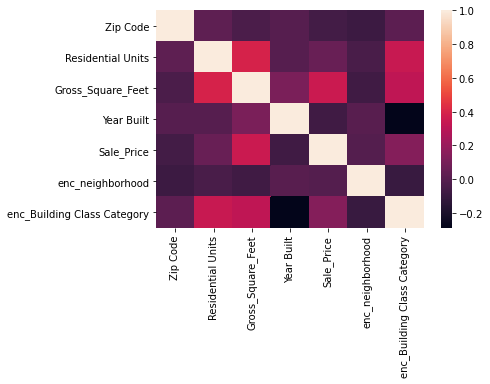

In [16]:
sb.heatmap(NYC_df.corr())

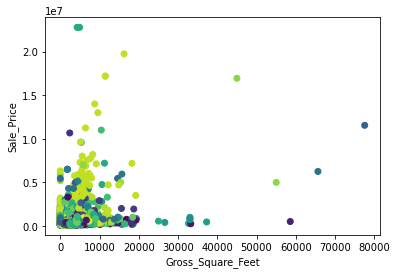

In [17]:
plt.scatter(NYC_df.Gross_Square_Feet, NYC_df.Sale_Price, c=NYC_df.enc_neighborhood)
plt.xlabel('Gross_Square_Feet')
plt.ylabel('Sale_Price')
plt.show()

In [18]:
X = NYC_df.drop(columns = ["Neighborhood", "Building Class Category", "Sale_Price", "Address", "Sale Date"])

In [19]:
X.shape

(37331, 6)

In [20]:
y = NYC_df.Sale_Price

In [21]:
X

,Zip Code,Residential Units,Gross_Square_Feet,Year Built,enc_neighborhood,enc_Building Class Category
0,10457,1,2128,1920,9,0
1,10457,1,2048,1901,9,0
2,10457,1,1460,1899,9,0
3,10457,1,1548,1899,9,0
4,10457,1,1188,1901,9,0
...,...,...,...,...,...,...
37326,10012,4,45000,1900,201,6
37327,10460,5,9000,1930,173,3
37328,11374,18,18445,2009,184,1
37329,10013,4,19200,1915,218,6


In [22]:
37331-(37331*.2)
x_train = X.iloc[0:29865]
x_test = X.iloc[29865:]
x_test

,Zip Code,Residential Units,Gross_Square_Feet,Year Built,enc_neighborhood,enc_Building Class Category
29865,10314,2,1800,1970,31,1
29866,10314,2,2404,1975,31,1
29867,10314,2,2200,2003,31,1
29868,10314,2,2088,1960,31,1
29869,10314,2,1900,2001,31,1
...,...,...,...,...,...,...
37326,10012,4,45000,1900,201,6
37327,10460,5,9000,1930,173,3
37328,11374,18,18445,2009,184,1
37329,10013,4,19200,1915,218,6


In [23]:
y_train = y.iloc[0:29865]
y_test = y.iloc[29865:]

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sts = StandardScaler()
x_scale = sts.fit(x_train)
x_train_scaled = x_scale.transform(x_train)
x_test_scaled = x_scale.transform(x_test)

In [26]:
model = LinearRegression()

In [27]:
model.fit(x_train_scaled, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(x_test_scaled)
print(y_pred.shape)
model.score(x_test, y_test)

(7466,)


-317332.2944650032

In [29]:
reg = LinearRegression()

In [30]:
reg.fit(x_train,y_train)

LinearRegression()

In [31]:
reg.score(X, y)

0.1418509426630954

In [32]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [33]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [34]:
clf.score(x_test,y_test)

0.30264696680762926